In [7]:
import pandas as pd
import scanpy as sc
import numpy as np
import torch
import sys
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'On device: {device}')
dtype = torch.float64

On device: cpu


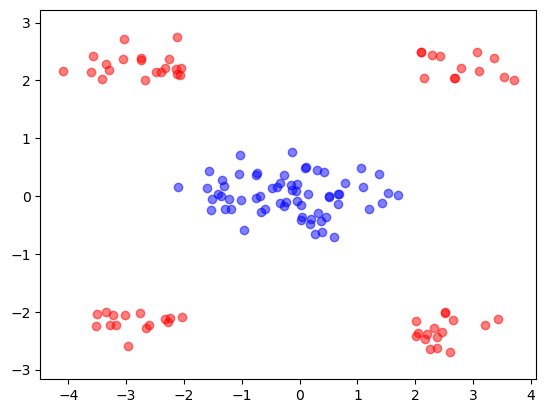

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

center_t1_A = np.array([0, 0])

center_t2_B = np.array([3, 1])
center_t2_C = np.array([-2, 1])

cov_t1_A = np.array([[6, 0], [0, 1]])
cov_t2_B = np.array([[2, 0], [0, 1]])
cov_t2_C = np.array([[2, 0], [0, 1]])

N = 64 #4096

num_A = N
num_B = int( N / 2 )
num_C = int( N / 2 )

var = .1 # var of Gaussians used to make each cluster

t1_A = np.random.multivariate_normal(center_t1_A, var*cov_t1_A, size=num_A)
t2_B = np.random.multivariate_normal(center_t2_B, var*cov_t2_B, size=num_B)
t2_C = np.random.multivariate_normal(center_t2_C, var*cov_t2_C, size=num_C)

# make expression data at each timepoint
X1 = t1_A

def dy_dt(vars, t):
    tau = 0.0
    x, y = vars
    if y > 0 and x > tau:
        dxdt = 2 #y - x
        dydt = 2
    elif y > 0 and x < -tau:
        dxdt = -2 #y - x
        dydt = 2
    elif y < 0 and x > tau:
        dxdt = 2 #y - x
        dydt = -2
    elif y < 0 and x < tau:
        dxdt = -2 #y - x
        dydt = -2
    
    return [dxdt, dydt]

X2 = np.zeros(X1.shape)

ts = np.array([0, 1, 2])
for i in range(X1.shape[0]):
    IC = X1[i,:]
    solution = np.array( odeint(dy_dt, [IC[0], IC[1]], ts) )
    X2[i,:] = solution[1,:]
    
plt.scatter(X1[:,0], X1[:,1], c='b', alpha=0.5)
plt.scatter(X2[:,0], X2[:,1], c='r', alpha=0.5)
plt.axis('equal')
plt.show()

Iteration: 0


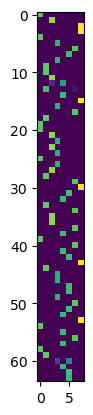

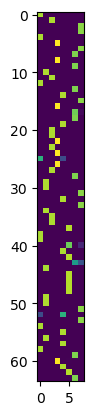

tensor([0.1250, 0.1249, 0.1251, 0.1248, 0.1250, 0.1249, 0.1250, 0.1251],
       dtype=torch.float64)
Next level cluster capacity: 8
Length of assignment sets X: 8, Y: 8 [=capacity]
Length of assignment sets X: 8, Y: 8 [=capacity]
Length of assignment sets X: 8, Y: 8 [=capacity]
Length of assignment sets X: 8, Y: 8 [=capacity]
Length of assignment sets X: 8, Y: 8 [=capacity]
Length of assignment sets X: 8, Y: 8 [=capacity]
Length of assignment sets X: 8, Y: 8 [=capacity]
Length of assignment sets X: 8, Y: 8 [=capacity]
Iteration: 0


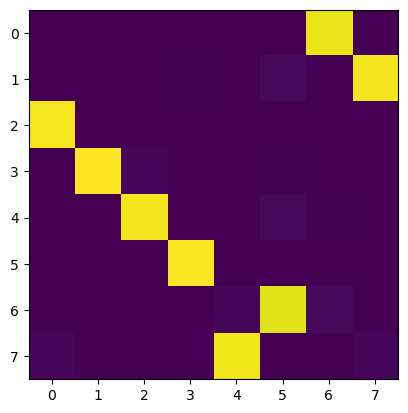

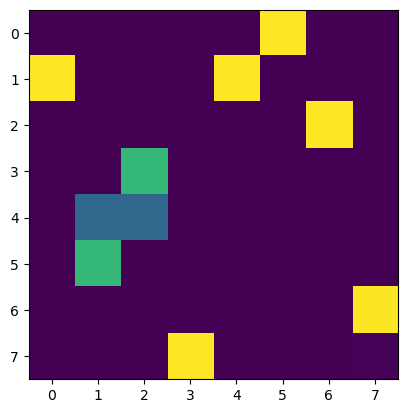

tensor([0.1248, 0.1251, 0.1249, 0.1248, 0.1248, 0.1248, 0.1249, 0.1251],
       dtype=torch.float64)
Next level cluster capacity: 1
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Iteration: 0


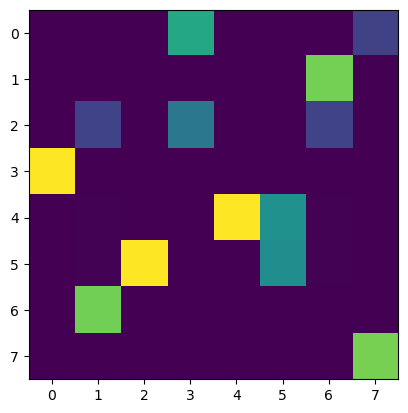

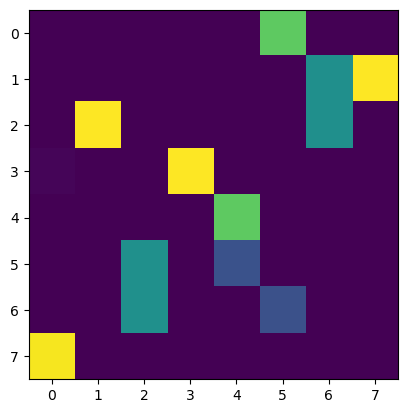

tensor([0.1250, 0.1248, 0.1251, 0.1249, 0.1251, 0.1250, 0.1248, 0.1248],
       dtype=torch.float64)
Next level cluster capacity: 1
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Iteration: 0


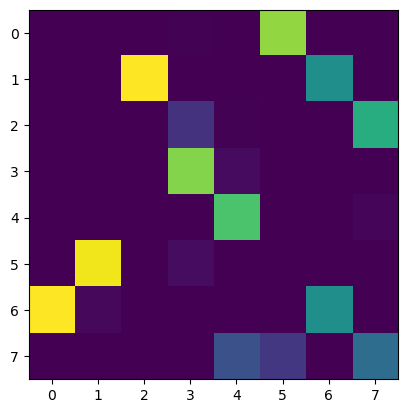

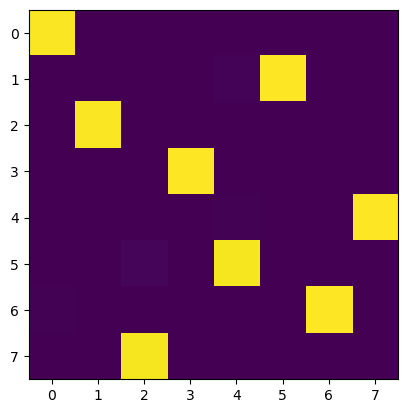

tensor([0.1250, 0.1249, 0.1250, 0.1247, 0.1250, 0.1248, 0.1249, 0.1247],
       dtype=torch.float64)
Next level cluster capacity: 1
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Iteration: 0


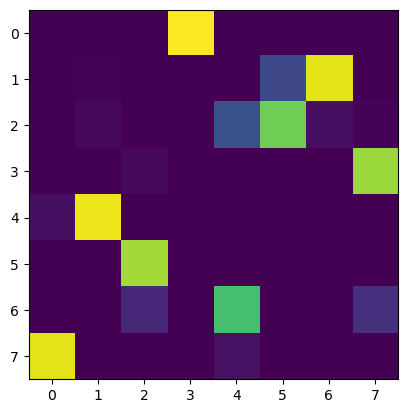

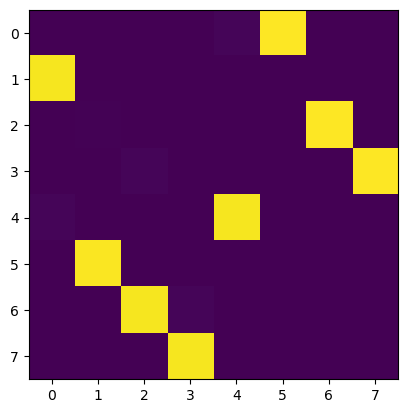

tensor([0.1250, 0.1250, 0.1248, 0.1250, 0.1248, 0.1249, 0.1249, 0.1248],
       dtype=torch.float64)
Next level cluster capacity: 1
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Iteration: 0


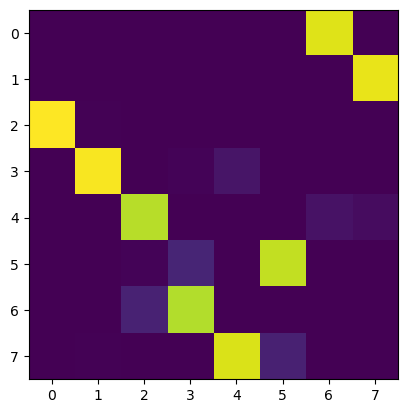

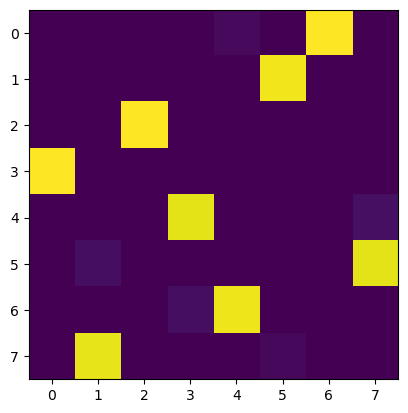

tensor([0.1250, 0.1248, 0.1250, 0.1248, 0.1249, 0.1250, 0.1250, 0.1248],
       dtype=torch.float64)
Next level cluster capacity: 1
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Iteration: 0


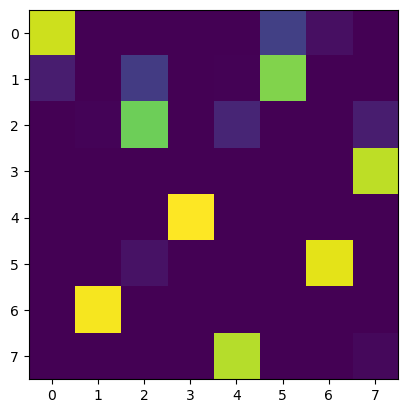

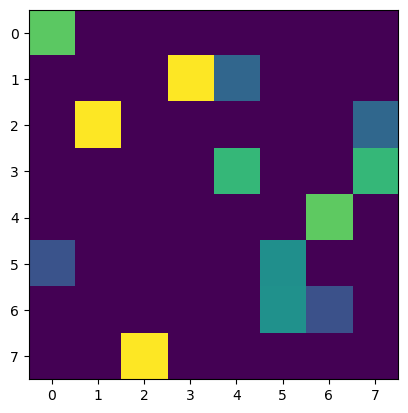

tensor([0.1252, 0.1248, 0.1249, 0.1249, 0.1248, 0.1249, 0.1250, 0.1248],
       dtype=torch.float64)
Next level cluster capacity: 1
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Iteration: 0


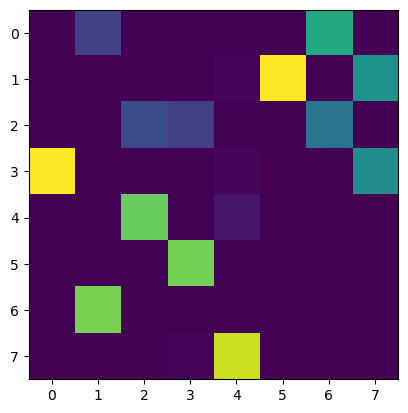

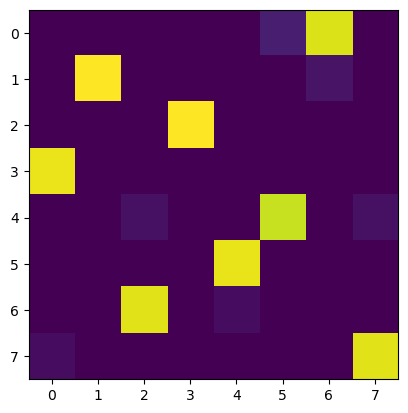

tensor([0.1250, 0.1248, 0.1248, 0.1248, 0.1250, 0.1250, 0.1249, 0.1250],
       dtype=torch.float64)
Next level cluster capacity: 1
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Iteration: 0


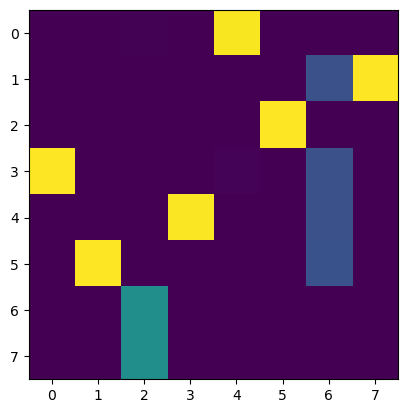

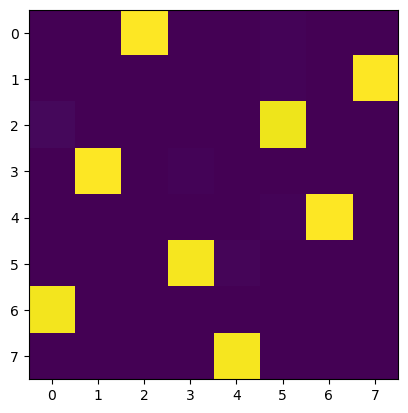

tensor([0.1251, 0.1250, 0.1249, 0.1249, 0.1250, 0.1249, 0.1249, 0.1250],
       dtype=torch.float64)
Next level cluster capacity: 1
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]
Length of assignment sets X: 1, Y: 1 [=capacity]


In [9]:
sys.path.insert(0, '../src/')
import importlib
import FRLC
from FRLC import FRLC_opt
import HR_OT

importlib.reload(HR_OT)

X = torch.from_numpy(X1).type(torch.DoubleTensor).to(device)
Y = torch.from_numpy(X2).type(torch.DoubleTensor).to(device)

n = X1.shape[0]
rank_schedule = [int(np.sqrt(n)), int(np.sqrt(n))]

F_t = HR_OT.hierarchical_refinement(X, Y, torch.tensor(rank_schedule), FRLC_opt, device=device, base_rank=1)

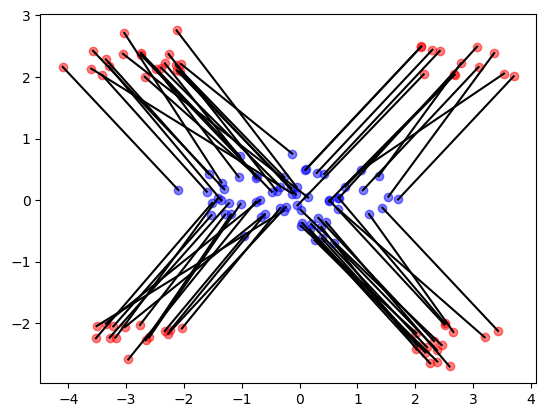

In [10]:
for pair in F_t:
    idx1, idx2 = pair
    idx1, idx2 = idx1.cpu().numpy(), idx2.cpu().numpy()
    x_values = X1[idx1, 0], X2[idx2, 0]
    y_values = X1[idx1, 1], X2[idx2, 1]
    plt.plot(x_values, y_values, c='black')

plt.scatter(X1[:,0], X1[:,1], c='b', label=r'Set A', alpha=0.5)
plt.scatter(X2[:,0], X2[:,1], c='r', label=r'Set B', alpha=0.5)

#plt.savefig('example_sparse.png')
plt.show()

In [11]:
import jax
import jax.numpy as jnp
from ott.geometry.geometry import Geometry
from ott.problems.linear import linear_problem
from ott.solvers.linear import sinkhorn

C = torch.cdist(X, Y)
C = C / C.max()

P = torch.zeros(C.shape)
for pair in F_t:
    idx1, idx2 = pair
    P[idx1, idx2] = 1
P = P/P.shape[0]

geom = Geometry(C.cpu().numpy())
ot_problem = linear_problem.LinearProblem(geom)
solver = sinkhorn.Sinkhorn()
ot_solution = solver(ot_problem)
P_sinkhorn = ot_solution.matrix

In [12]:
print(np.sum( C.cpu().numpy() * P_sinkhorn ))
print(torch.sum( C.to(device) * P.to(device) ))

0.47083288
tensor(0.4606, dtype=torch.float64)


In [13]:
X2_Sink = np.diag(1 / np.sum(P_sinkhorn, axis=0)) @ P_sinkhorn @ X2

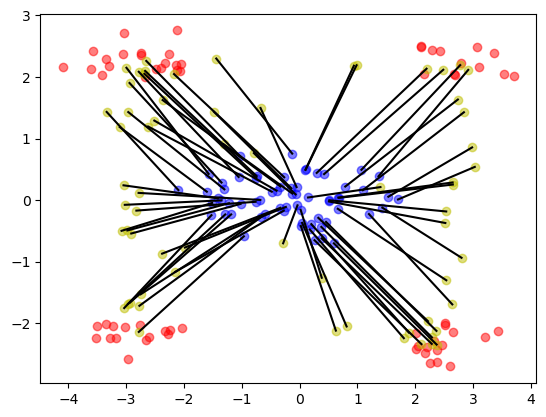

In [14]:

for idx1 in range(X1.shape[0]):
    x_values = X1[idx1, 0], X2_Sink[idx1, 0]
    y_values = X1[idx1, 1], X2_Sink[idx1, 1]
    plt.plot(x_values, y_values, c='black')

plt.scatter(X1[:,0], X1[:,1], c='b', label=r'Initial points', alpha=0.5)
plt.scatter(X2[:,0], X2[:,1], c='r', label=r'Final points', alpha=0.5)
plt.scatter(X2_Sink[:,0], X2_Sink[:,1], c='y', label=r'Barycentric projection', alpha=0.5)

#plt.savefig('example_sparse.png')
plt.show()